- Unsupervised learning involves analyzing datasets that have no labeled outcomes. Instead of predicting a specific target or category, the objective is to uncover the hidden patterns, structures, or relationships within the data itself. This usually means grouping observations into clusters or compressing information into fewer dimensions, all without the guidance of pre-assigned labels. Because there’s no explicit “correct” answer, success in an unsupervised task often depends on methods such as evaluating cluster cohesion or checking how effectively we’ve preserved the essential variance in a dimensionality reduction scenario.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
iris = datasets.load_iris()
X = iris.data

print("Shape of X:", X.shape)

Shape of X: (150, 4)


- K-Means, DBSCAN, and PCA may seem very different at first glance, but each shares a common purpose: extracting meaningful patterns from unlabeled data. While K-Means relies on minimizing distances within clusters, DBSCAN focuses on data density, and PCA aims to project information onto new axes with maximal variance. Their underlying mathematics offers a clearer view of how these algorithms function and, just as importantly, when they’re most appropriately applied.

In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Retrieve the cluster assignments for each sample
labels_kmeans = kmeans.labels_
print("K-Means cluster labels:", labels_kmeans)

# Check the final centroid positions
print("Cluster centroids:\n", kmeans.cluster_centers_)

K-Means cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Cluster centroids:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


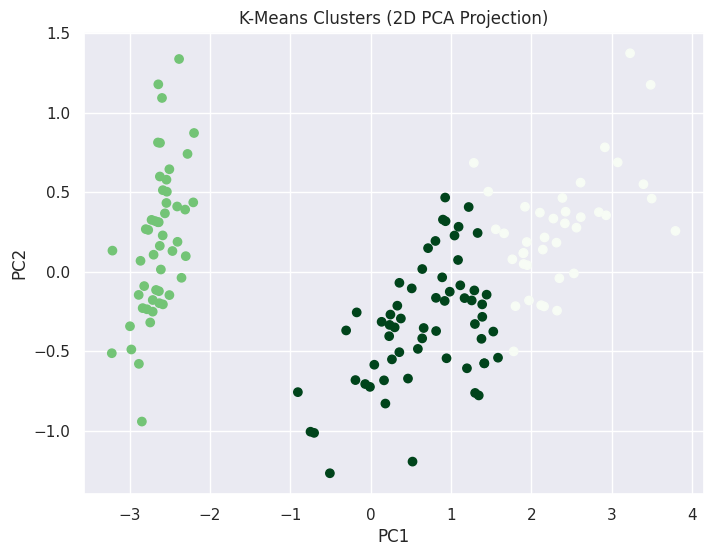

In [10]:
pca_kmeans = PCA(n_components=2)
X_2d_kmeans = pca_kmeans.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d_kmeans[:, 0], X_2d_kmeans[:, 1], c=labels_kmeans, cmap='Greens')
plt.title("K-Means Clusters (2D PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [11]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

labels_dbscan = dbscan.labels_
print("DBSCAN labels:", labels_dbscan)


DBSCAN labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


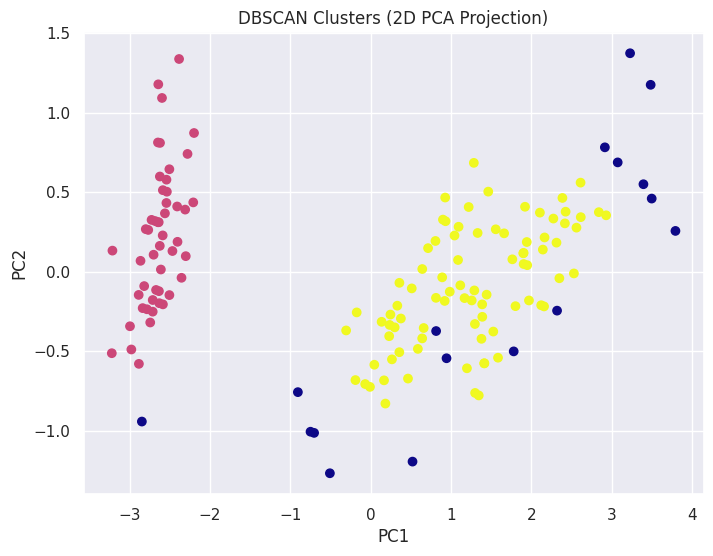

In [12]:
pca_dbscan = PCA(n_components=2)
X_2d_dbscan = pca_dbscan.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d_dbscan[:, 0], X_2d_dbscan[:, 1], c=labels_dbscan, cmap='plasma')
plt.title("DBSCAN Clusters (2D PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.92461872 0.05306648]


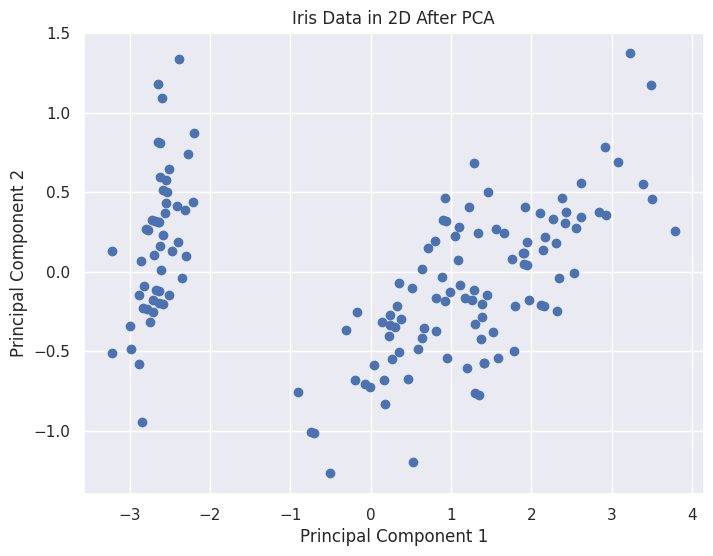

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("Iris Data in 2D After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

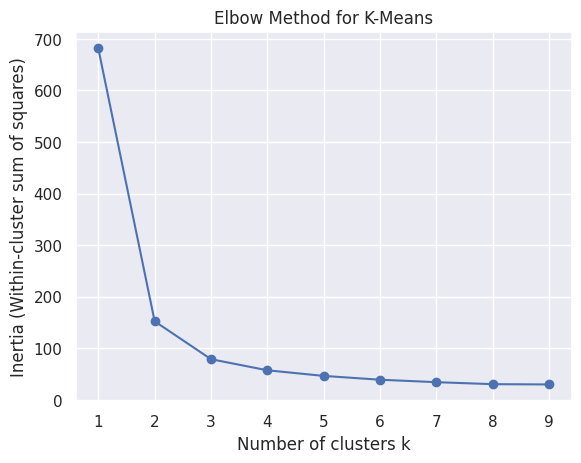

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
K_range = range(1, 10)  # Example: testing k = 1 to 9

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X)
    inertias.append(kmeans_temp.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.title("Elbow Method for K-Means")
plt.show()

In [16]:
from sklearn.metrics import silhouette_score

# Example with K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

silhouette_kmeans = silhouette_score(X, labels_kmeans)
print("Silhouette Score (K-Means):", silhouette_kmeans)

# Example with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels_dbscan = dbscan.labels_

# Check for -1 labels if you want to handle noise differently
silhouette_dbscan = silhouette_score(X, labels_dbscan)
print("Silhouette Score (DBSCAN):", silhouette_dbscan)

Silhouette Score (K-Means): 0.5511916046195919
Silhouette Score (DBSCAN): 0.48603419703456857


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)
# Example output might be something like [0.72, 0.18], indicating that
# the first two components capture 90% of the variance overall.

Explained variance ratio: [0.92461872 0.05306648]


In [18]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Suppose X is your original dataset (num_samples x num_features)
# For demonstration, let's pretend it has shape (150, 4) like the Iris features.

# 1) Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained variance ratio (first 2 components):", pca.explained_variance_ratio_)

# 2) Reconstruct back to the original feature space
#    (this only works if you haven't used any steps that break invertibility,
#     e.g., whitening or certain randomization).
X_reconstructed = pca.inverse_transform(X_pca)

# 3) Calculate the reconstruction error
#    A common approach is to use Mean Squared Error (MSE) between original and reconstructed data.
mse = mean_squared_error(X, X_reconstructed)
print("Mean Squared Reconstruction Error:", mse)

# 4) (Optional) Check how the reconstruction looks for a few samples
#    Compare the original and reconstructed values side-by-side for the first 5 samples:
for i in range(5):
    print(f"Original:      {X[i]}")
    print(f"Reconstructed: {X_reconstructed[i]}")
    print()

Explained variance ratio (first 2 components): [0.92461872 0.05306648]
Mean Squared Reconstruction Error: 0.025341073932398248
Original:      [5.1 3.5 1.4 0.2]
Reconstructed: [5.08303897 3.51741393 1.40321372 0.21353169]

Original:      [4.9 3.  1.4 0.2]
Reconstructed: [4.7462619  3.15749994 1.46356177 0.24024592]

Original:      [4.7 3.2 1.3 0.2]
Reconstructed: [4.70411871 3.1956816  1.30821697 0.17518015]

Original:      [4.6 3.1 1.5 0.2]
Reconstructed: [4.6422117  3.05696697 1.46132981 0.23973218]

Original:      [5.  3.6 1.4 0.2]
Reconstructed: [5.07175511 3.52655486 1.36373845 0.19699991]

